In [6]:

import os
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

logger = logging.getLogger('valeo.main')

def loadCsvData(pathAsStrList):
    try:
        return pd.read_csv(os.path.join(pathAsStrList[0], *pathAsStrList[1:]) )
        return None
    except (Exception):
        logger.exception("Error while load data from %s", "/".join(pathAsStrList))

data = loadCsvData(["..//data", "train", "traininginputs.csv"])
if data is not None:
    data.info()


# l = ["data", "train", "traininginputs.csv"]
# print(*l[1:])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PROC_TRACEINFO                   34515 non-null  object 
 1   OP070_V_1_angle_value            34515 non-null  float64
 2   OP090_SnapRingPeakForce_value    34515 non-null  float64
 3   OP070_V_2_angle_value            34515 non-null  float64
 4   OP120_Rodage_I_mesure_value      34515 non-null  float64
 5   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 6   OP110_Vissage_M8_torque_value    34515 non-null  float64
 7   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 8   OP120_Rodage_U_mesure_value      34515 non-null  float64
 9   OP070_V_1_torque_value           34515 non-null  float64
 10  OP090_StartLinePeakForce_value   34515 non-null  float64
 11  OP110_Vissage_M8_angle_value     34515 non-null  float64
 12  OP090_SnapRingMidP

In [7]:
data.head()

,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
0,I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60
1,I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40
2,I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61
3,I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61
4,I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61


In [8]:
data.info()
# 1 - On constate que plus de la moitié des valeurs de la feature 7 sont manquants
#     7   OP100_Capuchon_insertion_mesure  15888 non-null  float64
# 2 - Toutes les feature sont numériques, pas de features catégoriques
# 3 - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PROC_TRACEINFO                   34515 non-null  object 
 1   OP070_V_1_angle_value            34515 non-null  float64
 2   OP090_SnapRingPeakForce_value    34515 non-null  float64
 3   OP070_V_2_angle_value            34515 non-null  float64
 4   OP120_Rodage_I_mesure_value      34515 non-null  float64
 5   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 6   OP110_Vissage_M8_torque_value    34515 non-null  float64
 7   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 8   OP120_Rodage_U_mesure_value      34515 non-null  float64
 9   OP070_V_1_torque_value           34515 non-null  float64
 10  OP090_StartLinePeakForce_value   34515 non-null  float64
 11  OP110_Vissage_M8_angle_value     34515 non-null  float64
 12  OP090_SnapRingMidP

In [9]:
data_num_features = data.drop(columns = "PROC_TRACEINFO")
data_num_features.head(10)

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
0,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60
1,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40
2,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61
3,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61
4,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61
5,158.7,165.79,178.4,112.09,11.88,12.15,NaN,11.97,6.62,25.99,22.3,97.13,6.63
6,158.8,153.91,152.5,111.25,12.11,12.19,0.38,11.97,6.41,18.79,17.7,81.56,6.40
7,181.0,164.02,175.8,117.50,11.75,12.14,NaN,11.97,6.61,24.33,36.0,95.12,6.62
8,156.1,159.50,151.8,111.75,12.09,12.21,NaN,11.97,6.61,26.07,16.6,101.57,6.61
9,159.4,162.99,128.3,107.68,11.88,12.35,NaN,11.98,6.62,24.05,17.9,99.20,6.60


In [10]:
data[["OP070_V_1_angle_value","OP070_V_1_torque_value","OP070_V_2_angle_value","OP070_V_2_torque_value","OP110_Vissage_M8_angle_value","OP110_Vissage_M8_torque_value"]].describe()
# OP070_V_1_angle_value, OP070_V_2_angle_value: Std à 10% de la moyenne. Pas important
# OP110_Vissage_M8_angle_value: Outlier côté Max
# OP110_Vissage_M8_torque_value : Presque Constant

,OP070_V_1_angle_value,OP070_V_1_torque_value,OP070_V_2_angle_value,OP070_V_2_torque_value,OP110_Vissage_M8_angle_value,OP110_Vissage_M8_torque_value
count,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000
mean,159.906922,6.548403,159.618236,6.550867,17.878398,12.256785
std,15.662650,0.097602,15.091490,0.094814,6.785079,0.065319
min,101.800000,5.670000,82.000000,5.740000,6.300000,12.030000
25%,148.700000,6.410000,149.400000,6.420000,13.500000,12.210000
50%,158.000000,6.610000,158.700000,6.610000,16.400000,12.260000
75%,169.300000,6.620000,168.900000,6.610000,20.200000,12.300000
max,198.300000,6.670000,198.100000,6.670000,84.600000,12.500000


In [11]:
data[["OP090_StartLinePeakForce_value","OP090_SnapRingMidPointForce_val","OP090_SnapRingPeakForce_value","OP090_SnapRingFinalStroke_value"]].describe()
# OP090_StartLinePeakForce_value	OP090_SnapRingMidPointForce_val	OP090_SnapRingPeakForce_value	OP090_SnapRingFinalStroke_value:
# Min equal à 0

# OP090_StartLinePeakForce_value: Outlier cote MAx

# TODO: Calculer le nombre de ligne whose Min(x) is equal à 0

,OP090_StartLinePeakForce_value,OP090_SnapRingMidPointForce_val,OP090_SnapRingPeakForce_value,OP090_SnapRingFinalStroke_value
count,34515.000000,34515.000000,34515.000000,34515.000000
mean,23.630152,97.700978,156.915055,11.970190
std,2.546341,6.837714,11.271492,0.169873
min,0.000000,0.000000,0.000000,0.000000
25%,22.280000,94.310000,149.210000,11.850000
50%,23.880000,98.500000,156.180000,12.040000
75%,25.290000,102.230000,164.380000,12.080000
max,43.410000,127.300000,196.920000,12.190000


In [12]:
# data["OP090_StartLinePeakForce_value"].min()
# print(data[data["OP090_StartLinePeakForce_value"] == 0].count())   # 3
# print(data[data["OP090_SnapRingMidPointForce_val"] == 0].count())
# print(data[data["OP090_SnapRingPeakForce_value"] == 0].count())
# print(data[data["OP090_SnapRingFinalStroke_value"] == 0].count())
data[data["OP090_StartLinePeakForce_value"] == 0]

,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
549,I-B-XA1207672-190907-01953,137.4,0.0,166.7,105.51,0.0,12.22,0.41,11.97,6.43,0.0,20.6,0.0,6.40
1651,I-B-XA1207672-190821-01367,178.7,0.0,170.4,112.95,0.0,12.33,0.39,11.97,6.61,0.0,12.8,0.0,6.61
22483,I-B-XA1207672-190424-02168,166.4,0.0,171.5,117.26,0.0,12.16,NaN,11.97,6.62,0.0,13.3,0.0,6.61


In [120]:
data[["OP120_Rodage_I_mesure_value","OP120_Rodage_U_mesure_value","OP100_Capuchon_insertion_mesure"]].describe()
# 	OP120_Rodage_I_mesure_value: Outlier cote MaxOP120_Rodage_U_mesure_value	OP100_Capuchon_insertion_mesure : Très petite variance
#  OP120_Rodage_U_mesure_value	OP100_Capuchon_insertion_mesure : Très petite variance

,OP120_Rodage_I_mesure_value,OP120_Rodage_U_mesure_value,OP100_Capuchon_insertion_mesure
count,34515.000000,34515.000000,15888.000000
mean,113.350222,11.971027,0.388173
std,3.528522,0.003050,0.024425
min,99.990000,11.970000,0.240000
25%,111.040000,11.970000,0.380000
50%,113.160000,11.970000,0.390000
75%,115.380000,11.970000,0.410000
max,177.950000,11.990000,0.420000


In [84]:
#----------------------
# DONT RETAIN THIS CODE
#----------------------
def dataFrameImputer(dfToImpute, imputer):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(dfToImpute.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
#     #encode date
#     impute_ordinal = imputer.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    dfToImpute.loc[dfToImpute.notnull()] = np.squeeze(imputer.fit_transform(impute_reshape))
    return dfToImpute

In [96]:
#----------------------
# DONT RETAIN THIS CODE
#----------------------
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

print(data_num_features.columns)
cols = data_num_features.columns
print (type(cols))
imputer = IterativeImputer(BayesianRidge())
data_num_features = pd.DataFrame(imputer.fit_transform(data_num_features))
data_num_features.columns = cols
data_num_features.head(10)

# data_num_features1 = dataFrameImputer(data_num_features, IterativeImputer(BayesianRidge()))

Index(['OP070_V_1_angle_value', 'OP090_SnapRingPeakForce_value',
       'OP070_V_2_angle_value', 'OP120_Rodage_I_mesure_value',
       'OP090_SnapRingFinalStroke_value', 'OP110_Vissage_M8_torque_value',
       'OP100_Capuchon_insertion_mesure', 'OP120_Rodage_U_mesure_value',
       'OP070_V_1_torque_value', 'OP090_StartLinePeakForce_value',
       'OP110_Vissage_M8_angle_value', 'OP090_SnapRingMidPointForce_val',
       'OP070_V_2_torque_value'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
0,180.4,190.51,173.1,113.64,12.04,12.16,0.373167,11.97,6.62,26.37,18.8,109.62,6.60
1,138.7,147.70,163.5,109.77,12.12,12.19,0.390000,11.97,6.41,21.03,18.5,105.48,6.40
2,180.9,150.87,181.2,109.79,11.86,12.24,0.370687,11.97,6.62,25.81,17.5,100.03,6.61
3,173.5,159.56,151.8,113.25,11.82,12.35,0.390000,11.97,6.62,24.62,15.6,104.94,6.61
4,174.5,172.29,177.5,112.88,12.07,12.19,0.368990,11.97,6.62,29.22,33.6,99.19,6.61
5,158.7,165.79,178.4,112.09,11.88,12.15,0.366023,11.97,6.62,25.99,22.3,97.13,6.63
6,158.8,153.91,152.5,111.25,12.11,12.19,0.380000,11.97,6.41,18.79,17.7,81.56,6.40
7,181.0,164.02,175.8,117.50,11.75,12.14,0.368342,11.97,6.61,24.33,36.0,95.12,6.62
8,156.1,159.50,151.8,111.75,12.09,12.21,0.370136,11.97,6.61,26.07,16.6,101.57,6.61
9,159.4,162.99,128.3,107.68,11.88,12.35,0.366373,11.98,6.62,24.05,17.9,99.20,6.60


In [109]:
#----------------------
# DONT RETAIN THIS CODE
#----------------------
data_num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OP070_V_1_angle_value            34515 non-null  float64
 1   OP090_SnapRingPeakForce_value    34515 non-null  float64
 2   OP070_V_2_angle_value            34515 non-null  float64
 3   OP120_Rodage_I_mesure_value      34515 non-null  float64
 4   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 5   OP110_Vissage_M8_torque_value    34515 non-null  float64
 6   OP100_Capuchon_insertion_mesure  34515 non-null  float64
 7   OP120_Rodage_U_mesure_value      34515 non-null  float64
 8   OP070_V_1_torque_value           34515 non-null  float64
 9   OP090_StartLinePeakForce_value   34515 non-null  float64
 10  OP110_Vissage_M8_angle_value     34515 non-null  float64
 11  OP090_SnapRingMidPointForce_val  34515 non-null  float64
 12  OP070_V_2_torque_v

In [13]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    path = os.path.join("../images", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure attribute_histogram_plots


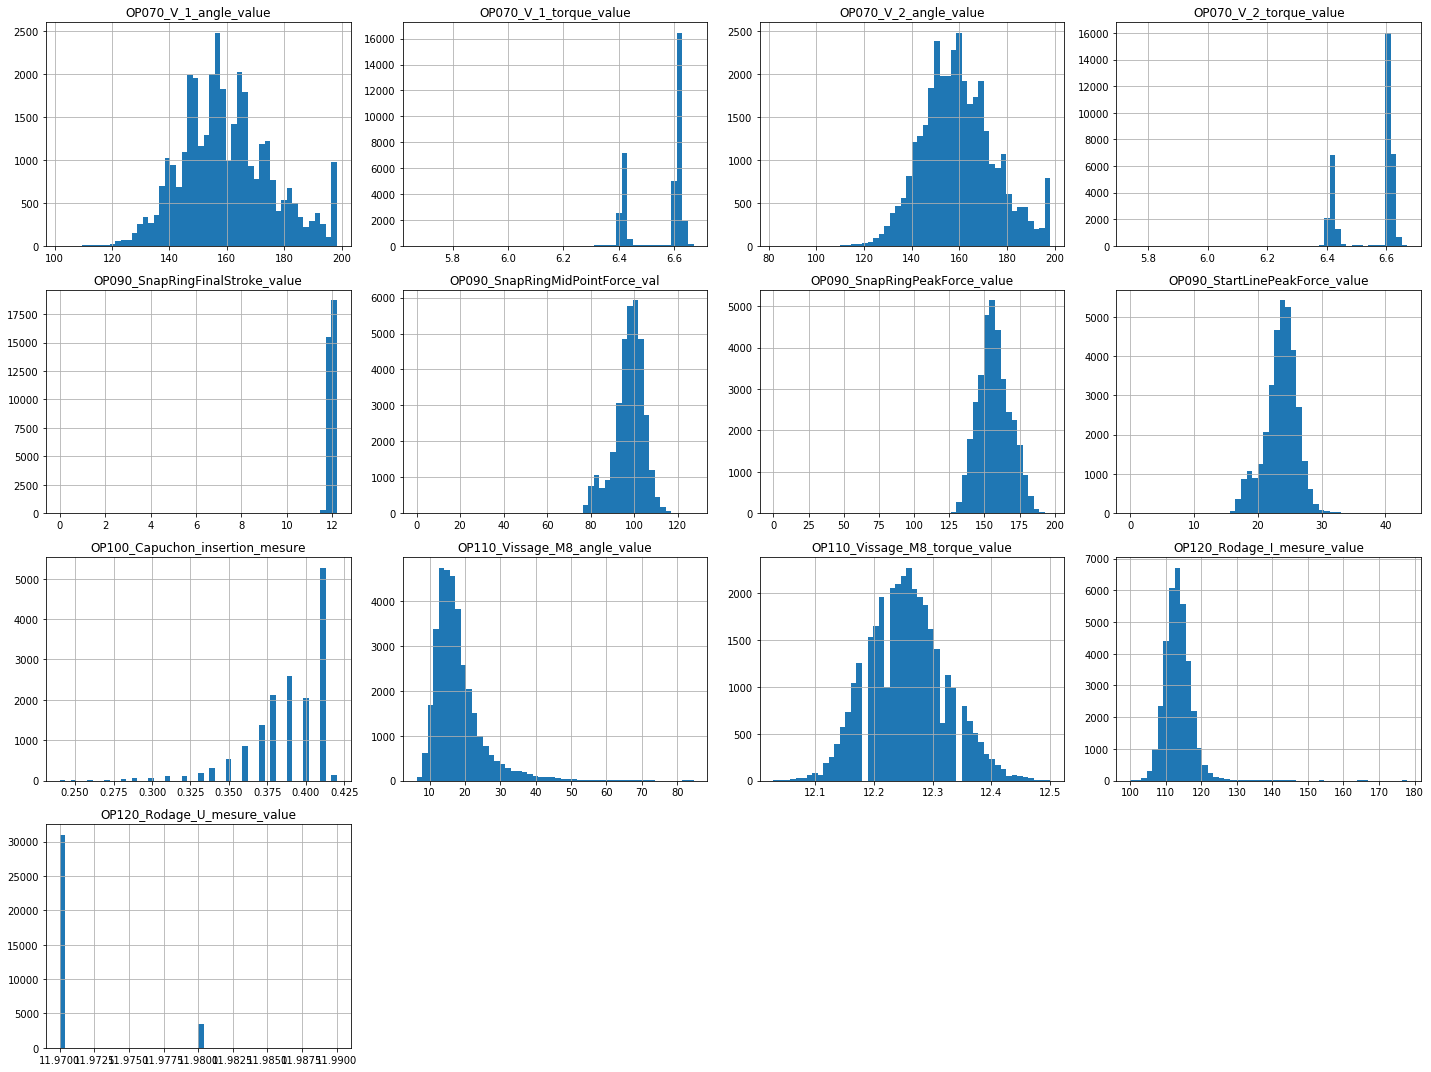

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

Saving figure attribute_histogram_plots_log10


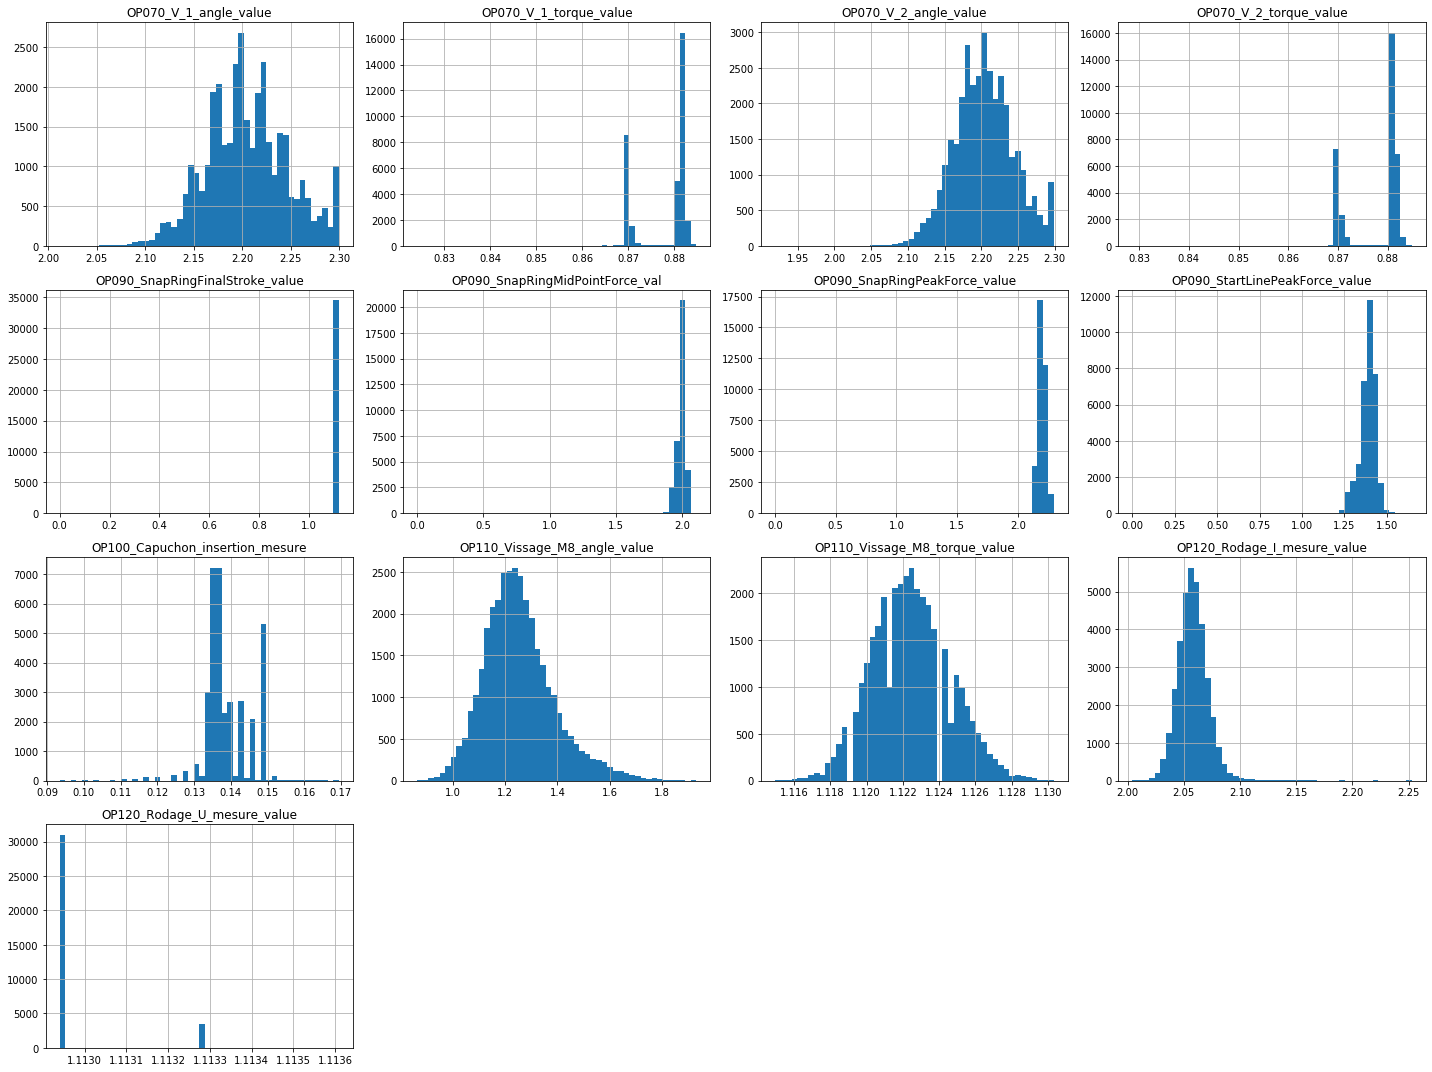

In [114]:
#----------------------
# NOT RETAINED
#----------------------
%matplotlib inline
import matplotlib.pyplot as plt

data_num_features = data_num_features + 1
data_num_features_log10 = data_num_features.applymap(np.log10)
data_num_features_log10.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_log10")
plt.show()

In [73]:
#----------------------
# DONT RETAIN THIS CODE
#----------------------
# data.applymap(math.log10)
# data.drop
# import math
data_num_features = data.drop(columns = "PROC_TRACEINFO")
# dd = data_num_features.applymap(np.log10)
data_num_features.applymap(np.log10).describe()
# data_num_features.applymap(math.log10).hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots_log10")
# plt.show()

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
count,34515.000000,3.451500e+04,34515.000000,34515.000000,3.451500e+04,34515.000000,15888.000000,34515.000000,34515.000000,3.451500e+04,34515.000000,3.451500e+04,34515.000000
mean,2.201803,-inf,2.201150,2.054216,-inf,1.088370,-0.411902,1.078131,0.816087,-inf,1.227427,-inf,0.816253
std,0.042301,NaN,0.040969,0.013337,NaN,0.002313,0.028949,0.000111,0.006522,NaN,0.141524,NaN,0.006330
min,2.007748,-inf,1.913814,1.999957,-inf,1.080266,-0.619789,1.078094,0.753583,-inf,0.799341,-inf,0.758912
25%,2.172311,2.173798e+00,2.174351,2.045479,1.073718e+00,1.086716,-0.420216,1.078094,0.806858,1.347915e+00,1.130334,1.974558e+00,0.807535
50%,2.198657,2.193625e+00,2.200577,2.053693,1.080626e+00,1.088490,-0.408935,1.078094,0.820201,1.378034e+00,1.214844,1.993436e+00,0.820201
75%,2.228657,2.215849e+00,2.227630,2.062131,1.082067e+00,1.089905,-0.387216,1.078094,0.820858,1.402949e+00,1.305351,2.009578e+00,0.820201
max,2.297323,2.294290e+00,2.296884,2.250298,1.086004e+00,1.096910,-0.376751,1.078819,0.824126,1.637590e+00,1.927370,2.104828e+00,0.824126


Saving figure scatter_matrix_plot


C:\envdev\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  


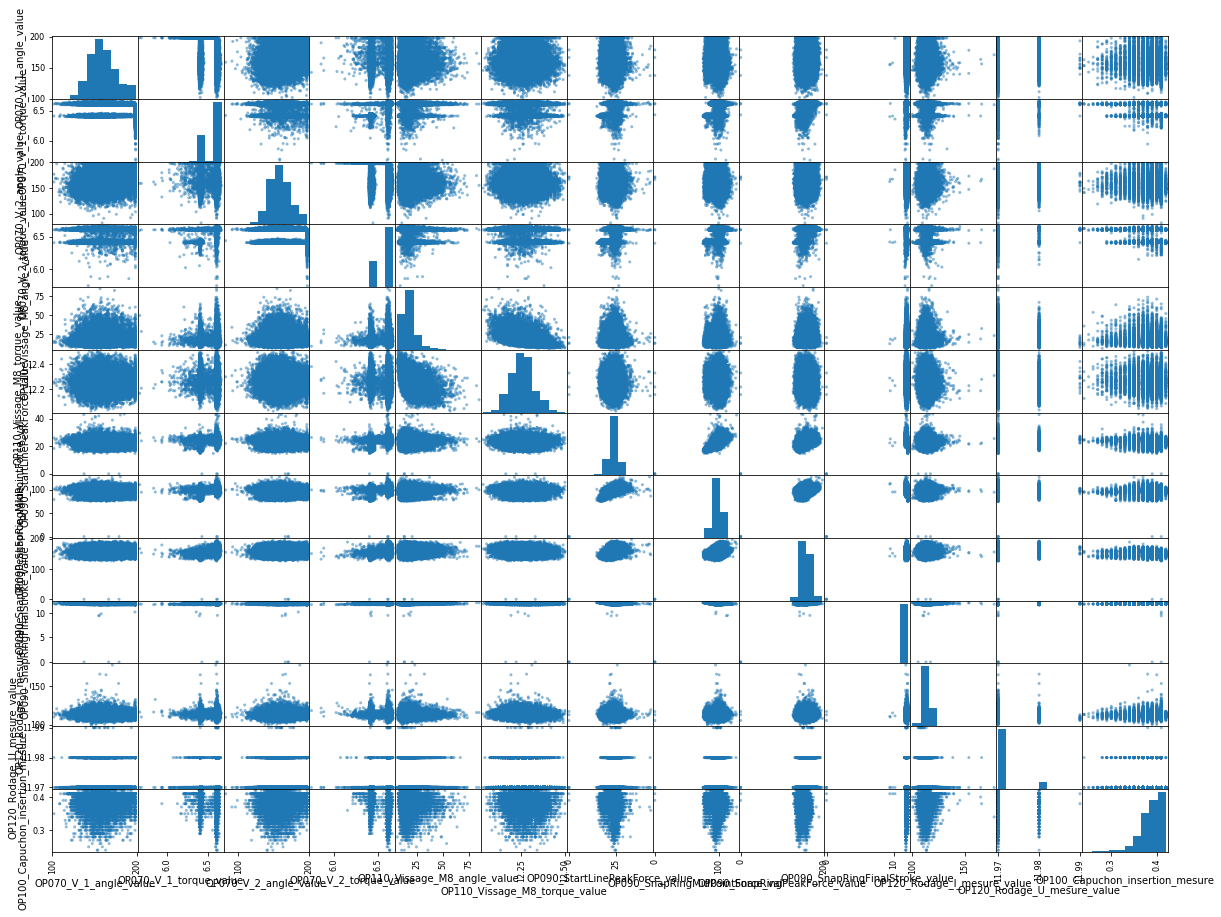

In [129]:
#----------------------
# DONT RETAIN THIS CODE
#----------------------
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas

# from pandas.plotting import scatter_matrix

# attributes = [
# "OP070_V_1_angle_value","OP070_V_1_torque_value","OP070_V_2_angle_value","OP070_V_2_torque_value","OP110_Vissage_M8_angle_value","OP110_Vissage_M8_torque_value",
# "OP090_StartLinePeakForce_value","OP090_SnapRingMidPointForce_val","OP090_SnapRingPeakForce_value","OP090_SnapRingFinalStroke_value",
# "OP120_Rodage_I_mesure_value","OP120_Rodage_U_mesure_value","OP100_Capuchon_insertion_mesure"]
# scatter_matrix(data[attributes], figsize=(20,15))
# save_fig("scatter_matrix_plot")

Saving figure scatter_matrix_plot


C:\envdev\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


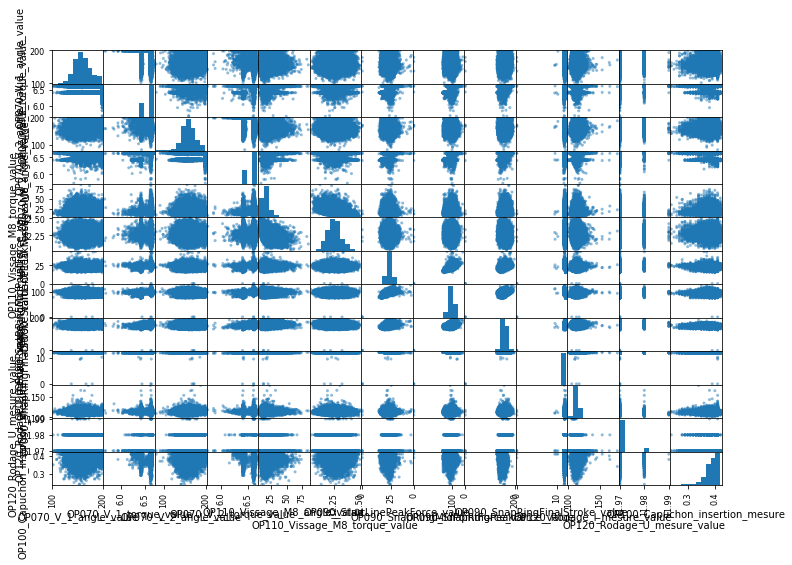

In [16]:
#----------------------
# DONT RETAIN THIS CODE
#----------------------

# from pandas.plotting import scatter_matrix

# attributes = [
# "OP070_V_1_angle_value","OP070_V_1_torque_value","OP070_V_2_angle_value","OP070_V_2_torque_value","OP110_Vissage_M8_angle_value","OP110_Vissage_M8_torque_value",
# "OP090_StartLinePeakForce_value","OP090_SnapRingMidPointForce_val","OP090_SnapRingPeakForce_value","OP090_SnapRingFinalStroke_value",
# "OP120_Rodage_I_mesure_value","OP120_Rodage_U_mesure_value","OP100_Capuchon_insertion_mesure"]
# scatter_matrix(data[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

Saving figure scatter_matrix_plot


C:\envdev\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


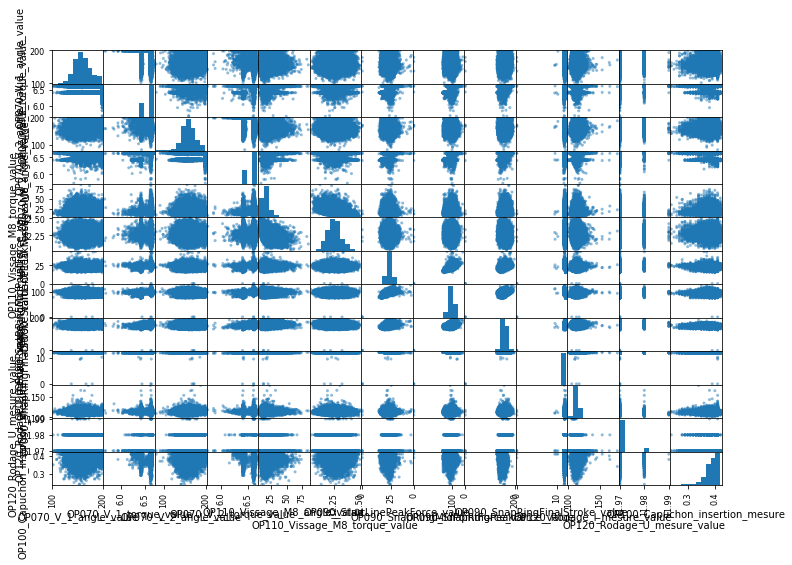

In [17]:
#----------------------
# DONT RETAIN THIS CODE
#----------------------
# from pandas.plotting import scatter_matrix
# attributes = [
# "OP070_V_1_angle_value","OP070_V_1_torque_value","OP070_V_2_angle_value","OP070_V_2_torque_value","OP110_Vissage_M8_angle_value","OP110_Vissage_M8_torque_value",
# "OP090_StartLinePeakForce_value","OP090_SnapRingMidPointForce_val","OP090_SnapRingPeakForce_value","OP090_SnapRingFinalStroke_value",
# "OP120_Rodage_I_mesure_value","OP120_Rodage_U_mesure_value","OP100_Capuchon_insertion_mesure"]
# scatter_matrix(data[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

In [20]:
output = loadCsvData(["..//data", "train", "trainingoutput.csv"])
output.head()

,PROC_TRACEINFO,Binar OP130_Resultat_Global_v
0,I-B-XA1207672-190429-00688,0
1,I-B-XA1207672-190828-00973,0
2,I-B-XA1207672-190712-03462,0
3,I-B-XA1207672-190803-00051,0
4,I-B-XA1207672-190508-03248,0


In [21]:
data.head()

,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
0,I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60
1,I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40
2,I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61
3,I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61
4,I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61


In [22]:
data_out = pd.merge(left=data, right=output, how='inner', left_on="PROC_TRACEINFO", right_on="PROC_TRACEINFO")
data_out.head()

,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar OP130_Resultat_Global_v
0,I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60,0
1,I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40,0
2,I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61,0
3,I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61,0
4,I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61,0


In [23]:
# data_out.drop(columns = "PROC_TRACEINFO")
data_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34515 entries, 0 to 34514
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PROC_TRACEINFO                   34515 non-null  object 
 1   OP070_V_1_angle_value            34515 non-null  float64
 2   OP090_SnapRingPeakForce_value    34515 non-null  float64
 3   OP070_V_2_angle_value            34515 non-null  float64
 4   OP120_Rodage_I_mesure_value      34515 non-null  float64
 5   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 6   OP110_Vissage_M8_torque_value    34515 non-null  float64
 7   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 8   OP120_Rodage_U_mesure_value      34515 non-null  float64
 9   OP070_V_1_torque_value           34515 non-null  float64
 10  OP090_StartLinePeakForce_value   34515 non-null  float64
 11  OP110_Vissage_M8_angle_value     34515 non-null  float64
 12  OP090_SnapRingMidP

In [24]:
corr_matrix = data_out.corr()
corr_matrix["Binar OP130_Resultat_Global_v"].sort_values(ascending=False)

Binar OP130_Resultat_Global_v      1.000000
OP100_Capuchon_insertion_mesure    0.032212
OP090_SnapRingFinalStroke_value    0.015148
OP090_SnapRingMidPointForce_val    0.014273
OP090_StartLinePeakForce_value     0.010720
OP110_Vissage_M8_angle_value       0.005470
OP120_Rodage_I_mesure_value        0.003763
OP110_Vissage_M8_torque_value     -0.002984
OP070_V_2_angle_value             -0.006342
OP090_SnapRingPeakForce_value     -0.007290
OP120_Rodage_U_mesure_value       -0.010492
OP070_V_1_angle_value             -0.012793
OP070_V_1_torque_value            -0.037438
OP070_V_2_torque_value            -0.039752
Name: Binar OP130_Resultat_Global_v, dtype: float64

Saving figure scatter_matrix_plot_corr_1


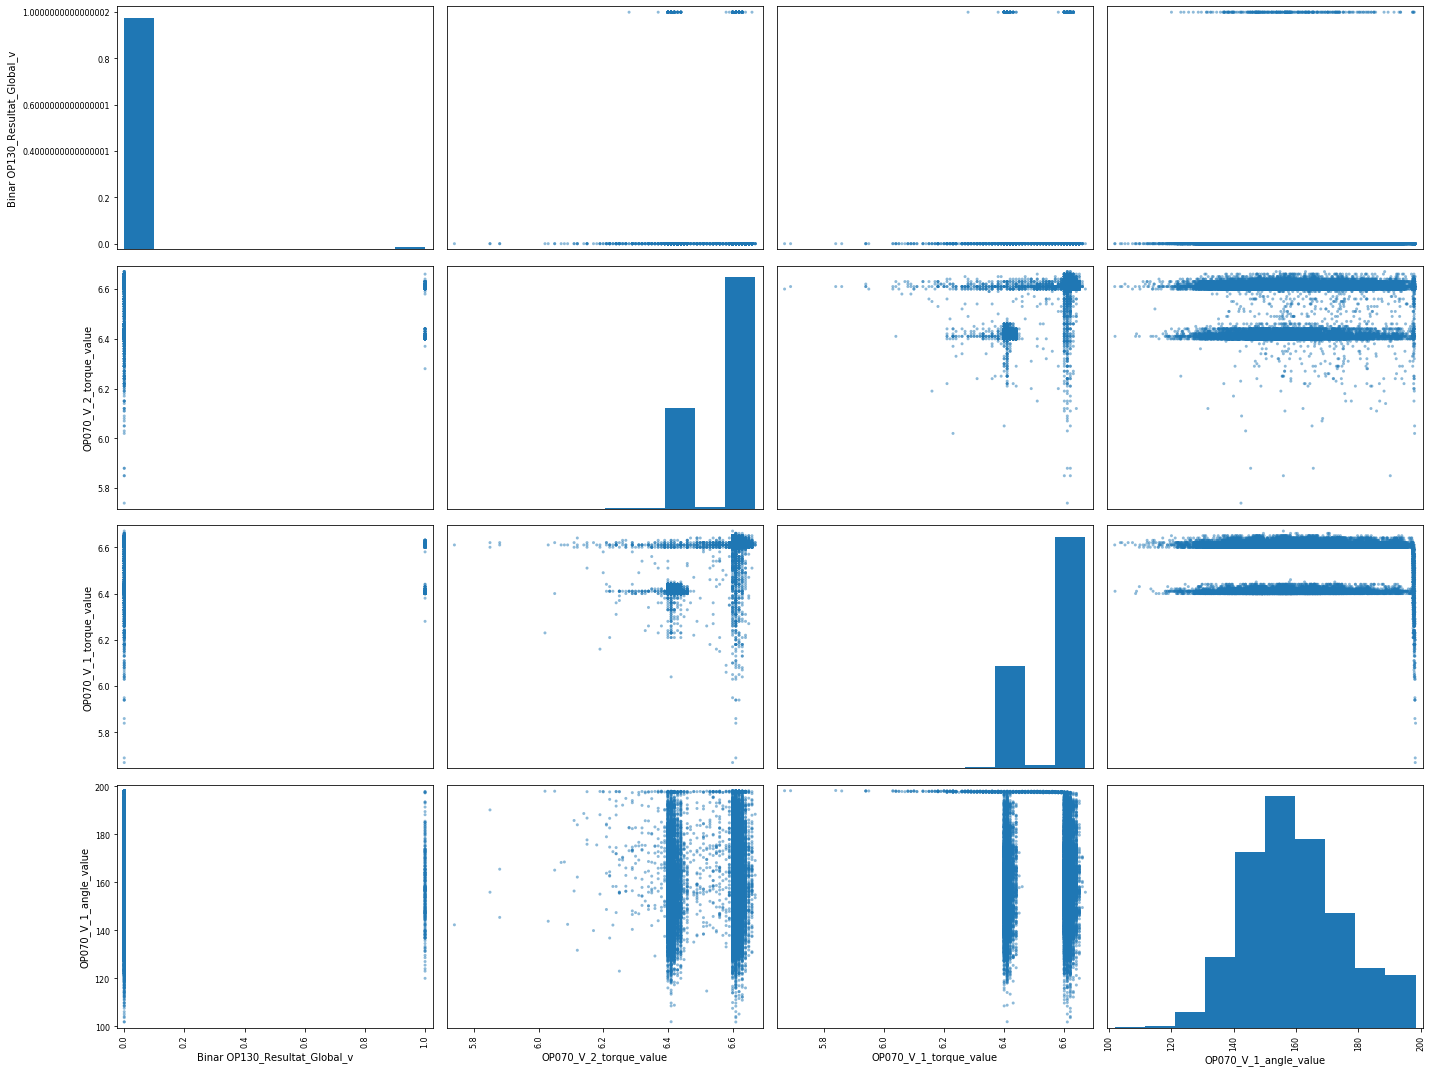

In [25]:
attributes = ["Binar OP130_Resultat_Global_v","OP070_V_2_torque_value","OP070_V_1_torque_value","OP070_V_1_angle_value"]
scatter_matrix(data_out[attributes], figsize=(20,15))
save_fig("scatter_matrix_plot_corr_1")

Saving figure scatter_matrix_plot_corr_2


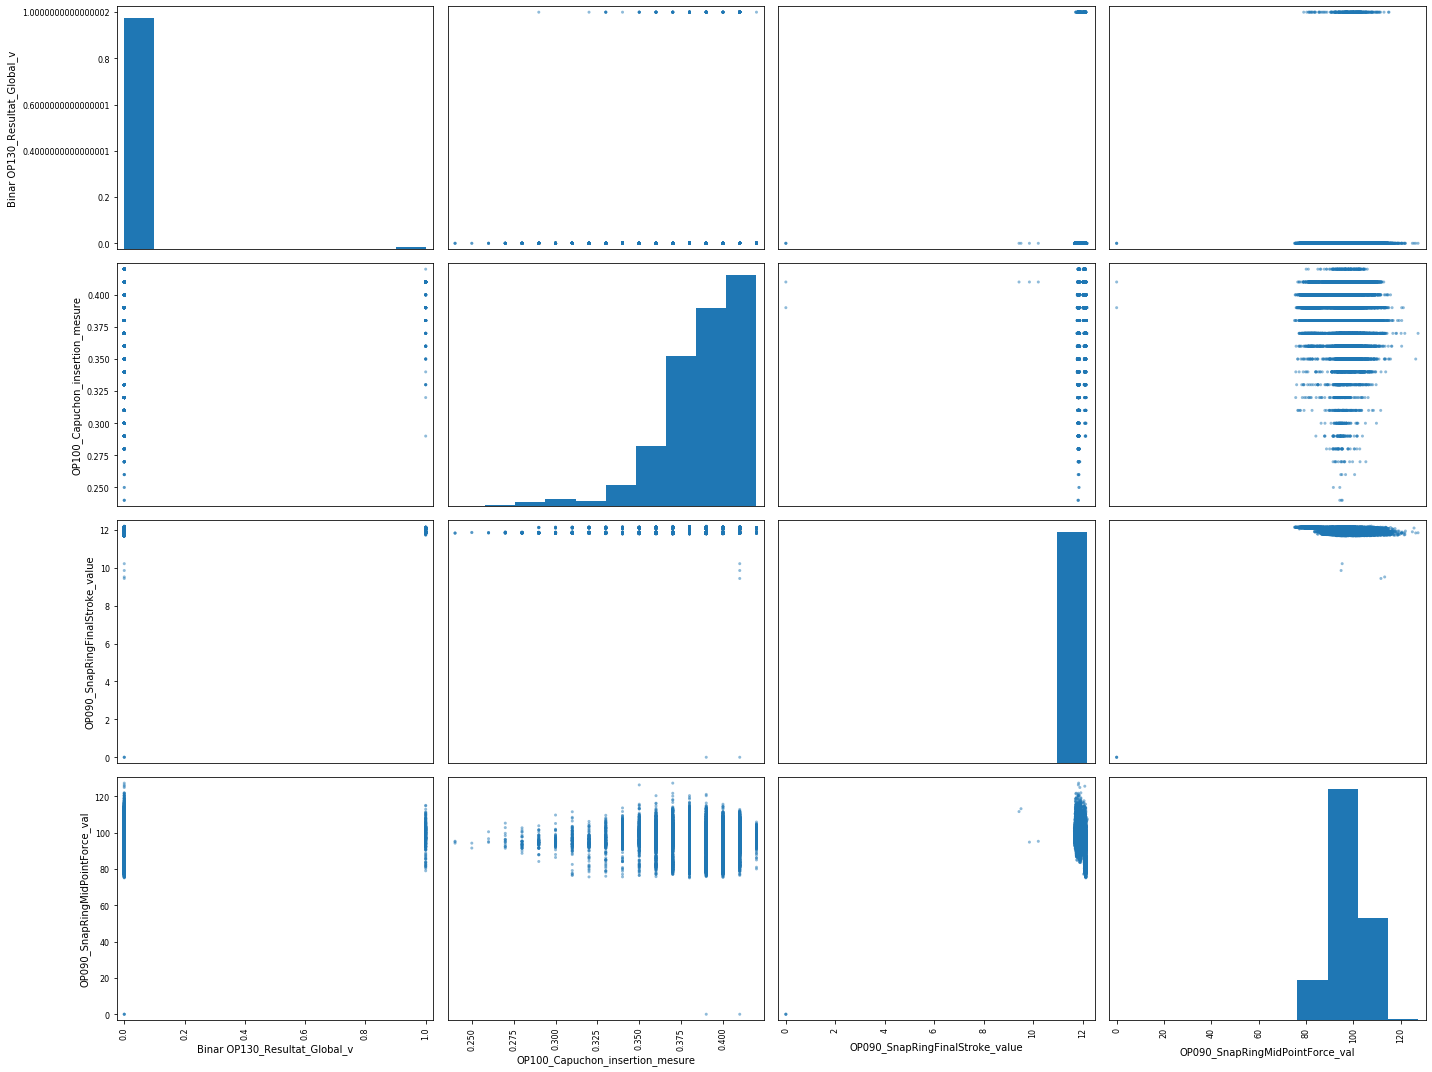

In [147]:
attributes = ["Binar OP130_Resultat_Global_v","OP100_Capuchon_insertion_mesure","OP090_SnapRingFinalStroke_value","OP090_SnapRingMidPointForce_val"]
scatter_matrix(data_out[attributes], figsize=(20,15))
save_fig("scatter_matrix_plot_corr_2")

In [28]:
data_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34515 entries, 0 to 34514
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PROC_TRACEINFO                   34515 non-null  object 
 1   OP070_V_1_angle_value            34515 non-null  float64
 2   OP090_SnapRingPeakForce_value    34515 non-null  float64
 3   OP070_V_2_angle_value            34515 non-null  float64
 4   OP120_Rodage_I_mesure_value      34515 non-null  float64
 5   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 6   OP110_Vissage_M8_torque_value    34515 non-null  float64
 7   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 8   OP120_Rodage_U_mesure_value      34515 non-null  float64
 9   OP070_V_1_torque_value           34515 non-null  float64
 10  OP090_StartLinePeakForce_value   34515 non-null  float64
 11  OP110_Vissage_M8_angle_value     34515 non-null  float64
 12  OP090_SnapRingMidP

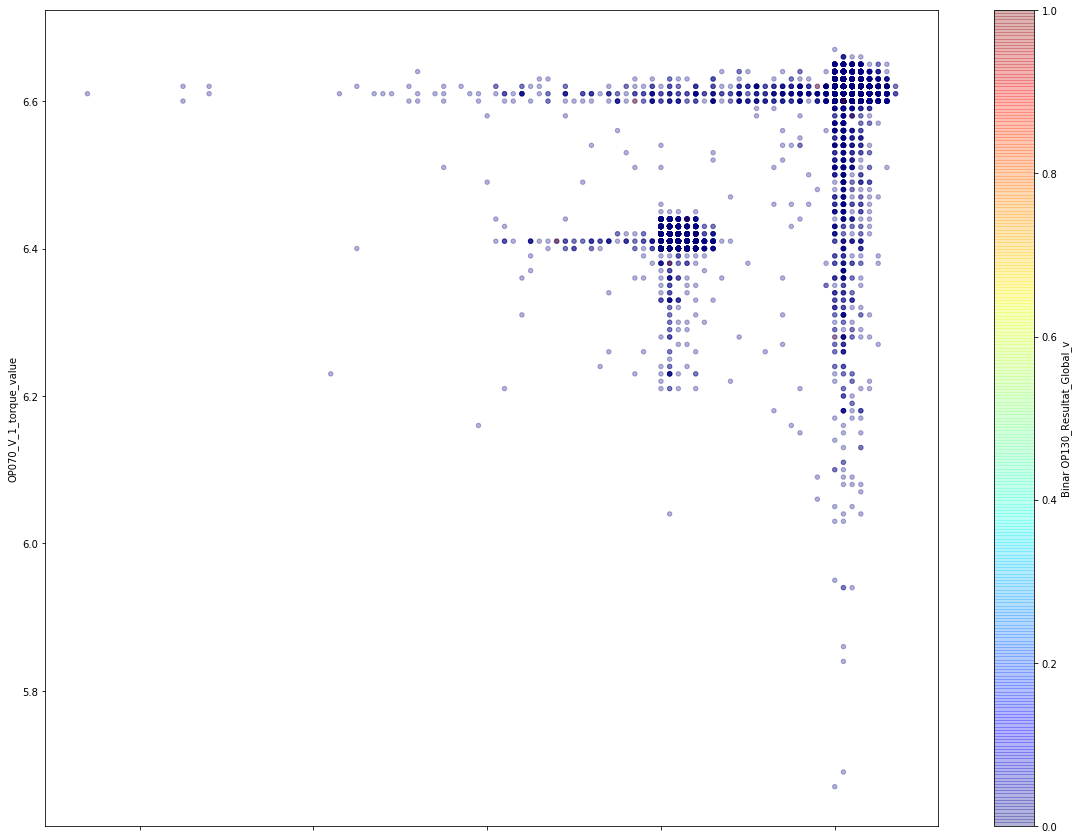

In [34]:
data_out.plot(kind="scatter", x="OP070_V_2_torque_value", y = "OP070_V_1_torque_value", 
              c="Binar OP130_Resultat_Global_v", cmap=plt.get_cmap("jet"), colorbar = True,
              figsize=(20,15),
              alpha=0.3)  # jet : ranges from Blue(=0) to Red(=1)
# plt.axis([0, 16, 0, 550000])
# save_fig("income_vs_house_value_scatterplot")

# No conclusion about this code ......

In [ ]:
#   data.drop(columns = "PROC_TRACEINFO")